<a href="https://www.kaggle.com/code/lalit7881/2026-ai-models-benchmark-59-76?scriptVersionId=291757387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-models-benchmark-dataset-2026-latest/ai_models_performance.csv


## ✨ 2026 AI Models Benchmark

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/ai-models-benchmark-dataset-2026-latest/ai_models_performance.csv")

In [3]:
df.head()

,Model,Context Window,Creator,Intelligence Index,Price (Blended USD/1M Tokens),Speed(median token/s),Latency (First Answer Chunk /s)
0,GPT-5.2 (xhigh),400k,OpenAI,51,$4.81,100,44.29
1,Claude Opus 4.5,200k,Anthropic,49,$10.00,79,1.70
2,Gemini 3 Pro Preview (high),1m,Google,48,$4.50,128,32.19
3,GPT-5.1 (high),400k,OpenAI,47,$3.44,127,26.50
4,Gemini 3 Flash,1m,Google,46,$1.13,224,11.62


In [4]:
df.tail()

,Model,Context Window,Creator,Intelligence Index,Price (Blended USD/1M Tokens),Speed(median token/s),Latency (First Answer Chunk /s)
183,Grok Voice Agent,32k,xAI,--,$0.00,0,0.00
184,Olmo 3.1 32B Think,66k,Allen Institute for AI,--,$0.00,60,0.54
185,Cogito v2.1,128k,Deep Cogito,--,$1.25,74,0.38
186,Mi:dm K 2.5 Pro Preview,128k,Korea Telecom,--,$0.00,0,0.00
187,Doubao-Seed-1.8,256k,ByteDance Seed,--,$0.15,0,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Model                            188 non-null    object 
 1   Context Window                   188 non-null    object 
 2   Creator                          188 non-null    object 
 3   Intelligence Index               188 non-null    object 
 4   Price (Blended USD/1M Tokens)    188 non-null    object 
 5   Speed(median token/s)            188 non-null    int64  
 6   Latency (First Answer Chunk /s)  188 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 10.4+ KB


In [6]:
df.dtypes

Model                               object
Context Window                      object
Creator                             object
Intelligence Index                  object
Price (Blended USD/1M Tokens)       object
Speed(median token/s)                int64
Latency (First Answer Chunk /s)    float64
dtype: object

In [7]:
df.shape

(188, 7)

In [8]:
df.isnull().sum()

Model                              0
Context Window                     0
Creator                            0
Intelligence Index                 0
Price (Blended USD/1M Tokens)      0
Speed(median token/s)              0
Latency (First Answer Chunk /s)    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.columns

Index(['Model', 'Context Window', 'Creator', 'Intelligence Index',
       'Price (Blended USD/1M Tokens)', 'Speed(median token/s)',
       'Latency (First Answer Chunk /s)'],
      dtype='object')

In [11]:
print(df["Intelligence Index"].head(10))
print(df["Intelligence Index"].dtype)

0    51
1    49
2    48
3    47
4    46
5    45
6    43
7    42
8    42
9    42
Name: Intelligence Index, dtype: object
object


## Data visualizations

In [12]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [13]:
df["Intelligence Index"] = (
    df["Intelligence Index"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.replace("%", "", regex=False)
    .str.extract(r"([-+]?\d*\.?\d+)", expand=False)
    .astype(float)
)


In [14]:
print(df["Intelligence Index"].dtype)
print(df["Intelligence Index"].isna().sum())

float64
6


In [15]:
df["Model"] = df["Model"].astype(str)

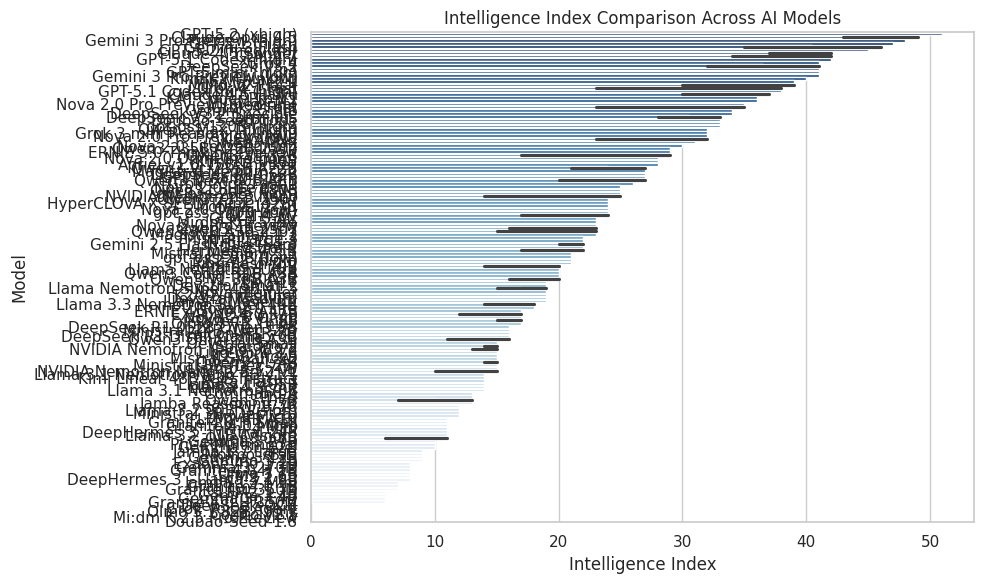

In [16]:
df_sorted = df.sort_values("Intelligence Index", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_sorted,
    y="Model",                 # categorical
    x="Intelligence Index",    # numeric
    orient="h",                # force horizontal
    palette="Blues_r"
)

plt.title("Intelligence Index Comparison Across AI Models")
plt.xlabel("Intelligence Index")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


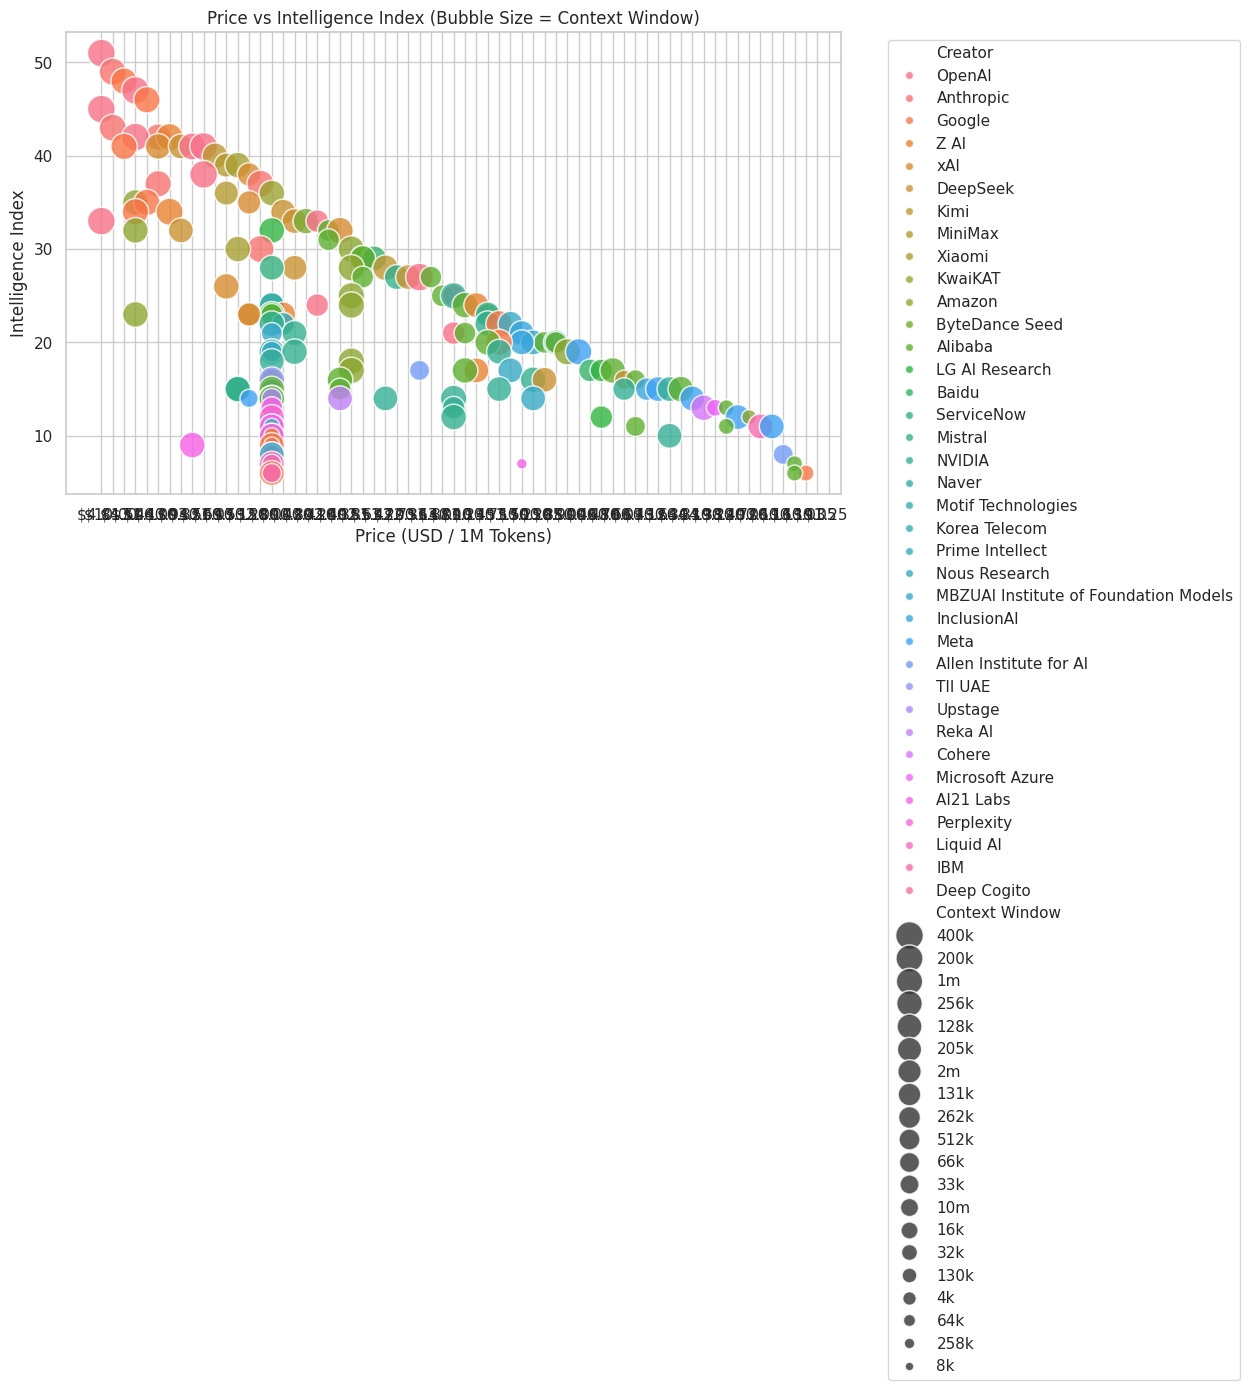

In [17]:
plt.figure()
sns.scatterplot(
    data=df,
    x="Price (Blended USD/1M Tokens)",
    y="Intelligence Index",
    hue="Creator",
    size="Context Window",
    sizes=(40, 400),
    alpha=0.8
)
plt.title("Price vs Intelligence Index (Bubble Size = Context Window)")
plt.xlabel("Price (USD / 1M Tokens)")
plt.ylabel("Intelligence Index")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

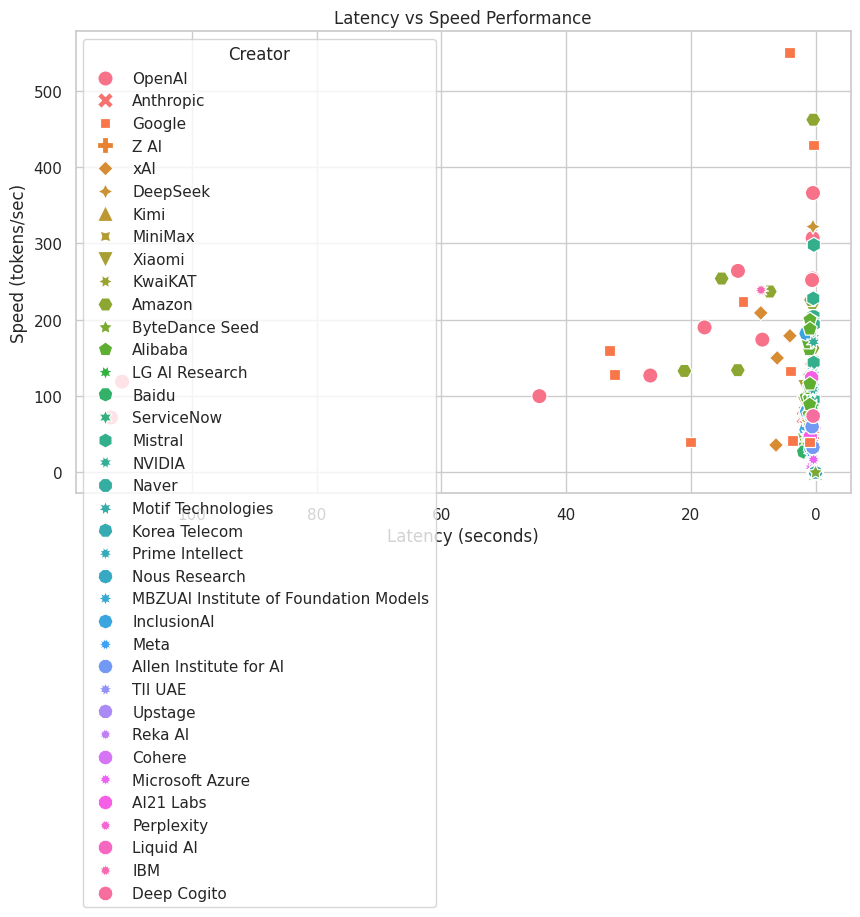

In [18]:
plt.figure()
sns.scatterplot(
    data=df,
    x="Latency (First Answer Chunk /s)",
    y="Speed(median token/s)",
    hue="Creator",
    style="Creator",
    s=120
)
plt.title("Latency vs Speed Performance")
plt.xlabel("Latency (seconds)")
plt.ylabel("Speed (tokens/sec)")
plt.gca().invert_xaxis()  # lower latency is better
plt.show()

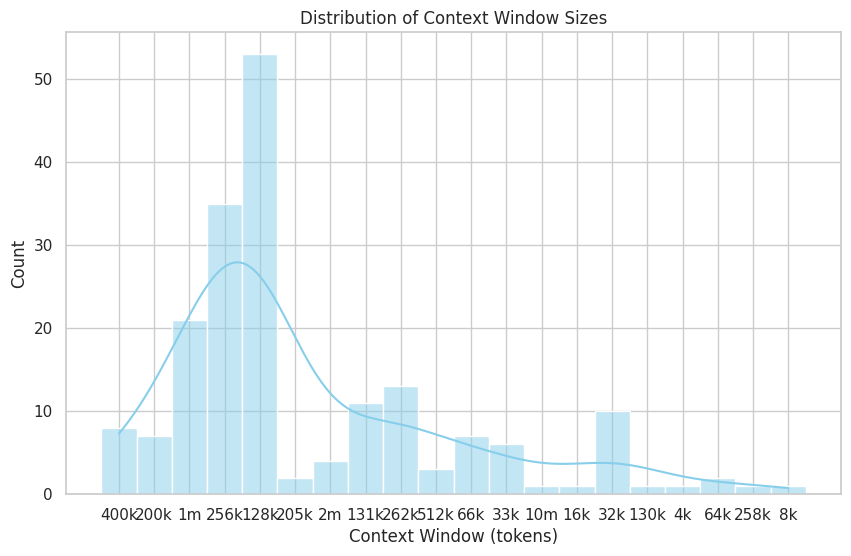

In [19]:
plt.figure()
sns.histplot(
    df["Context Window"],
    bins=20,
    kde=True,
    color="skyblue"
)
plt.title("Distribution of Context Window Sizes")
plt.xlabel("Context Window (tokens)")
plt.ylabel("Count")
plt.show()

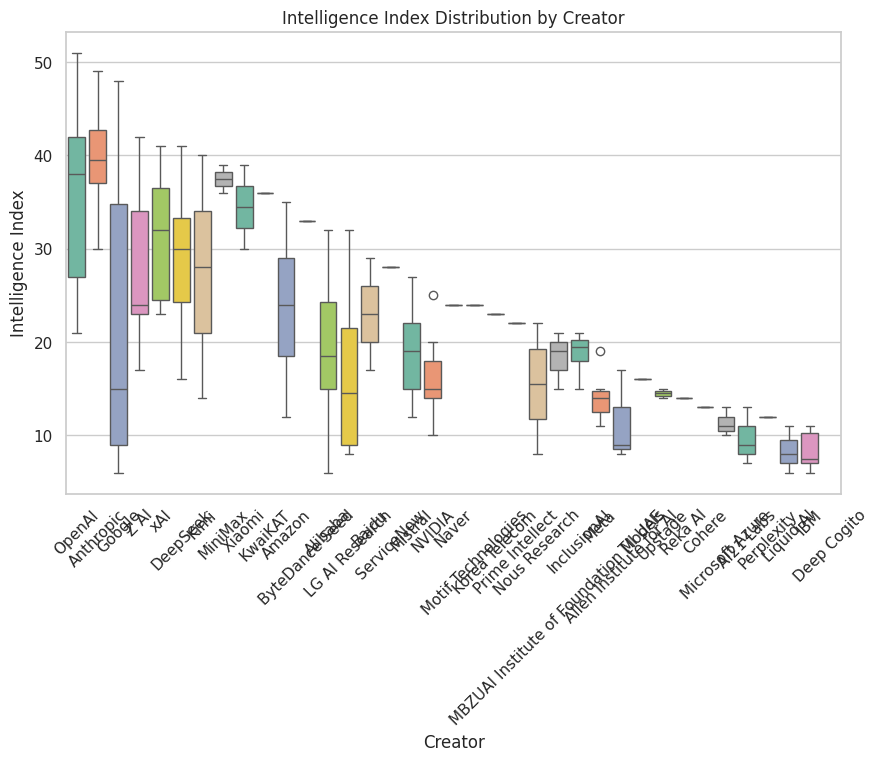

In [20]:
plt.figure()
sns.boxplot(
    data=df,
    x="Creator",
    y="Intelligence Index",
    palette="Set2"
)
plt.title("Intelligence Index Distribution by Creator")
plt.xlabel("Creator")
plt.ylabel("Intelligence Index")
plt.xticks(rotation=45)
plt.show()

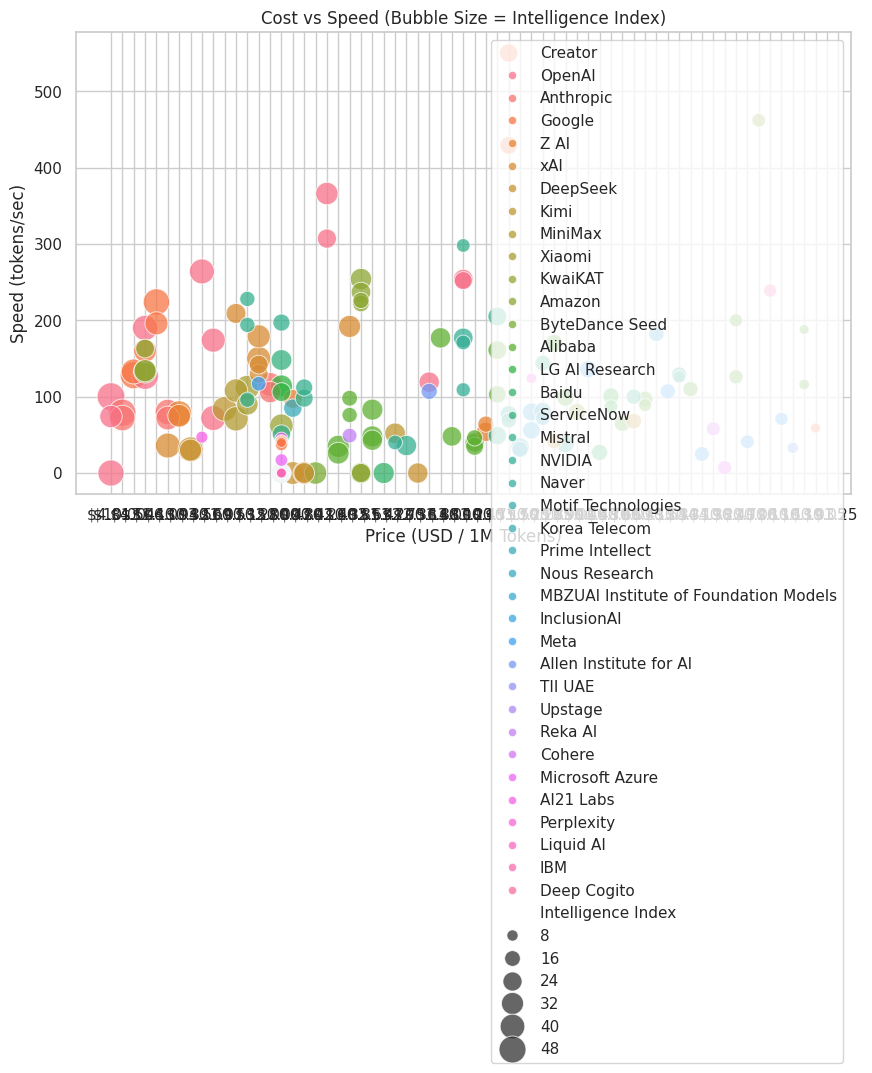

In [21]:
plt.figure()
sns.scatterplot(
    data=df,
    x="Price (Blended USD/1M Tokens)",
    y="Speed(median token/s)",
    hue="Creator",
    size="Intelligence Index",
    sizes=(50, 400),
    alpha=0.75
)
plt.title("Cost vs Speed (Bubble Size = Intelligence Index)")
plt.xlabel("Price (USD / 1M Tokens)")
plt.ylabel("Speed (tokens/sec)")
plt.show()


In [22]:
import re

def clean_numeric(series: pd.Series) -> pd.Series:
    def parse(val):
        if pd.isna(val):
            return np.nan

        val = str(val).strip().lower()

        multiplier = 1
        if val.endswith("k"):
            multiplier = 1_000
            val = val[:-1]
        elif val.endswith("m"):
            multiplier = 1_000_000
            val = val[:-1]

        val = re.sub(r"[^0-9.\-]", "", val)

        try:
            return float(val) * multiplier
        except:
            return np.nan

    return series.apply(parse)

In [23]:
numeric_cols = [
    "Context Window",
    "Intelligence Index",
    "Price (Blended USD/1M Tokens)",
    "Speed(median token/s)",
    "Latency (First Answer Chunk /s)"
]

for col in numeric_cols:
    df[col] = clean_numeric(df[col])


In [24]:
df = df.dropna(subset=numeric_cols)

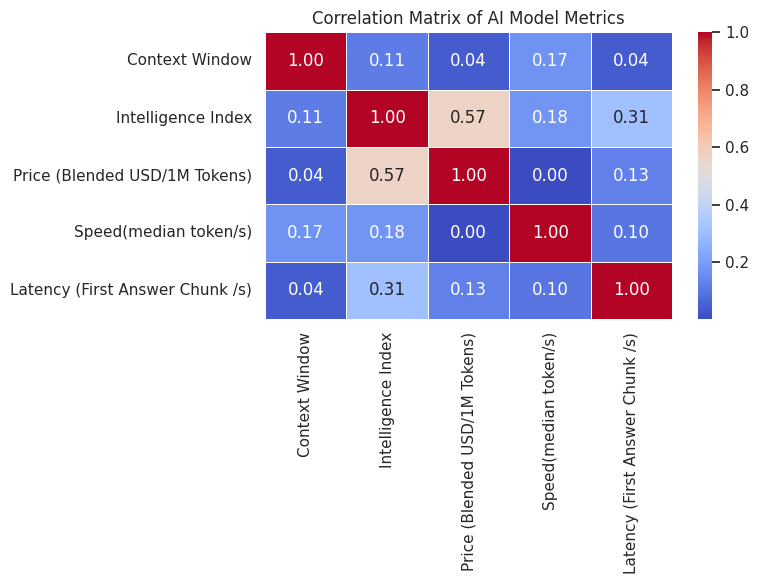

In [25]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix of AI Model Metrics")
plt.tight_layout()
plt.show()


## ML Algorithms

In [26]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
def clean_numeric(series):
    def parse(x):
        if pd.isna(x):
            return np.nan

        x = str(x).lower().strip()
        multiplier = 1

        if x.endswith("k"):
            multiplier = 1_000
            x = x[:-1]
        elif x.endswith("m"):
            multiplier = 1_000_000
            x = x[:-1]

        x = re.sub(r"[^0-9.\-]", "", x)

        try:
            return float(x) * multiplier
        except:
            return np.nan

    return series.apply(parse)


numeric_cols = [
    "Context Window",
    "Intelligence Index",
    "Price (Blended USD/1M Tokens)",
    "Speed(median token/s)",
    "Latency (First Answer Chunk /s)"
]

for col in numeric_cols:
    df[col] = clean_numeric(df[col])


In [28]:
df = df.dropna(subset=["Intelligence Index"])

df["Intelligence Level"] = pd.qcut(
    df["Intelligence Index"],
    q=3,
    labels=["Low", "Medium", "High"]
)

print(df["Intelligence Level"].value_counts())


Intelligence Level
Low       66
High      60
Medium    56
Name: count, dtype: int64


In [29]:
X = df[
    [
        "Context Window",
        "Price (Blended USD/1M Tokens)",
        "Speed(median token/s)",
        "Latency (First Answer Chunk /s)"
    ]
]

y = df["Intelligence Level"]

df = df.dropna(subset=X.columns)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}


In [33]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    results.append((name, round(acc, 2)))

results_df = pd.DataFrame(
    results,
    columns=["Algorithm", "Accuracy (%)"]
).sort_values("Accuracy (%)", ascending=False)

print(results_df)


             Algorithm  Accuracy (%)
2                  KNN         59.46
4        Random Forest         59.46
0  Logistic Regression         56.76
1                  SVM         56.76
5    Gradient Boosting         54.05
3        Decision Tree         48.65
6          Naive Bayes         43.24


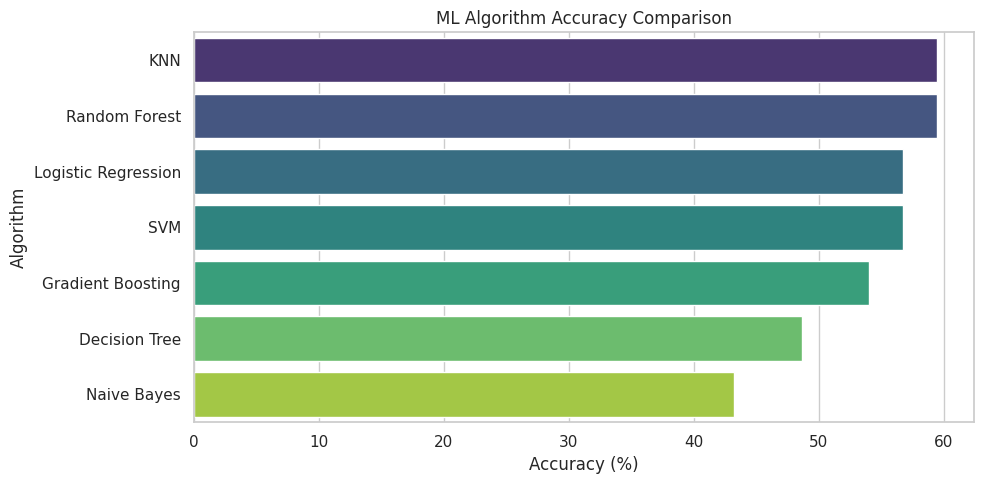

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=results_df,
    x="Accuracy (%)",
    y="Algorithm",
    palette="viridis"
)

plt.title("ML Algorithm Accuracy Comparison")
plt.xlabel("Accuracy (%)")
plt.ylabel("Algorithm")
plt.tight_layout()
plt.show()


## Thank you...pls upvote!!!!